# 1) Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from utils import nomes, decode_rle, save_dataframe_as_feather

# 2) Carregar dataset

In [49]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image,width,height
59766,case149_day15_slice_0080,stomach,28024 8 28288 11 28553 13 28818 14 29083 15 29...,.\train\case149\case149_day15\scans\slice_0080...,266,266
46604,case32_day19_slice_0131,large_bowel,None,.\train\case32\case32_day19\scans\slice_0131_2...,266,266
106211,case135_day0_slice_0111,stomach,None,.\train\case135\case135_day0\scans\slice_0111_...,266,266
93467,case78_day0_slice_0098,small_bowel,None,.\train\case78\case78_day0\scans\slice_0098_36...,360,310
49318,case11_day13_slice_0090,stomach,None,.\train\case11\case11_day13\scans\slice_0090_3...,360,310
...,...,...,...,...,...,...
92701,case147_day14_slice_0041,large_bowel,None,.\train\case147\case147_day14\scans\slice_0041...,266,266
58641,case143_day23_slice_0106,small_bowel,None,.\train\case143\case143_day23\scans\slice_0106...,266,266
67362,case147_day14_slice_0064,small_bowel,None,.\train\case147\case147_day14\scans\slice_0064...,266,266
71733,case107_day19_slice_0128,large_bowel,None,.\train\case107\case107_day19\scans\slice_0128...,266,266


## Código para converter máscara RLE para matriz de pixels

In [50]:
dataset['decoded_segmentation'] = dataset.apply(
	lambda x:
		None if x['segmentation'] is None
		else decode_rle(
			x['segmentation'],
			shape=(x['height'], x['width'])
		),
	axis=1
)
# dataset['decoded_segmentation_2'] = dataset['decoded_segmentation'].vflatten()
dataset

,id,class,segmentation,image,width,height,decoded_segmentation
59766,case149_day15_slice_0080,stomach,28024 8 28288 11 28553 13 28818 14 29083 15 29...,.\train\case149\case149_day15\scans\slice_0080...,266,266,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
46604,case32_day19_slice_0131,large_bowel,None,.\train\case32\case32_day19\scans\slice_0131_2...,266,266,None
106211,case135_day0_slice_0111,stomach,None,.\train\case135\case135_day0\scans\slice_0111_...,266,266,None
93467,case78_day0_slice_0098,small_bowel,None,.\train\case78\case78_day0\scans\slice_0098_36...,360,310,None
49318,case11_day13_slice_0090,stomach,None,.\train\case11\case11_day13\scans\slice_0090_3...,360,310,None
...,...,...,...,...,...,...,...
92701,case147_day14_slice_0041,large_bowel,None,.\train\case147\case147_day14\scans\slice_0041...,266,266,None
58641,case143_day23_slice_0106,small_bowel,None,.\train\case143\case143_day23\scans\slice_0106...,266,266,None
67362,case147_day14_slice_0064,small_bowel,None,.\train\case147\case147_day14\scans\slice_0064...,266,266,None
71733,case107_day19_slice_0128,large_bowel,None,.\train\case107\case107_day19\scans\slice_0128...,266,266,None


(266, 266) 266 266
.\train\case146\case146_day0\scans\slice_0109_266_266_1.50_1.50.png


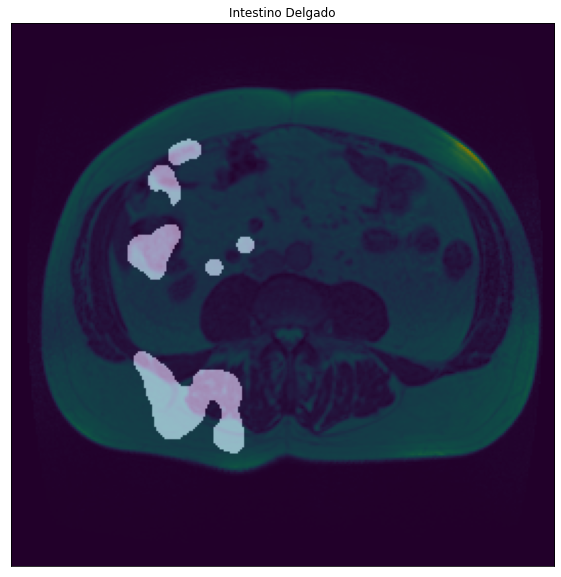

In [54]:
linha = dataset[dataset['segmentation'].notnull()].sample(1).iloc[0]
decoded_segmentation = linha['decoded_segmentation']

print(decoded_segmentation.shape, linha['width'], linha['height'])

# Ajustar se matriz tiver invertido largura com altura
if (
	decoded_segmentation.shape[0] != linha['height'] and
	decoded_segmentation.shape[1] != linha['width']
):
	decoded_segmentation = decoded_segmentation.reshape(linha['width'], linha['height'])
	print('>', decoded_segmentation.shape, linha['width'], linha['height'])

# Desenhar
fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

plt.imshow(plt.imread(linha['image']))
plt.imshow(decoded_segmentation, alpha=0.5, cmap='gray')

print(linha['image'])
plt.title(nomes[linha['class']])
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
# dataset.sample(10).apply(lambda x: (plt.imread(x['image']).shape, x['width'], x['height']), axis=1)

def w(linha):
	return (plt.imread(linha['image']).shape[1])

def h(linha):
	return (plt.imread(linha['image']).shape[0])

dataset['width'] = dataset.apply(w, axis=1)
dataset['height'] = dataset.apply(h, axis=1)
dataset
# 115448

,id,class,segmentation,image,width,height
32667,case30_day0_slice_0093,small_bowel,None,.\train\case30\case30_day0\scans\slice_0093_26...,266,266
103994,case54_day30_slice_0058,small_bowel,27033 4 27296 9 27560 13 27824 17 28089 19 281...,.\train\case54\case54_day30\scans\slice_0058_2...,266,266
63904,case18_day19_slice_0108,large_bowel,49948 6 50306 10 50665 12 51025 13 51385 13 51...,.\train\case18\case18_day19\scans\slice_0108_3...,360,310
26458,case88_day0_slice_0086,large_bowel,21431 21 21790 24 21834 12 22150 62 22509 64 2...,.\train\case88\case88_day0\scans\slice_0086_36...,360,310
87403,case74_day0_slice_0005,large_bowel,None,.\train\case74\case74_day0\scans\slice_0005_26...,266,266
...,...,...,...,...,...,...
37823,case2_day3_slice_0064,small_bowel,27841 7 28106 10 28371 12 28636 17 28668 10 28...,.\train\case2\case2_day3\scans\slice_0064_266_...,266,266
5096,case144_day15_slice_0069,stomach,28301 9 28565 14 28830 20 29095 23 29361 25 29...,.\train\case144\case144_day15\scans\slice_0069...,266,266
15655,case18_day25_slice_0012,small_bowel,None,.\train\case18\case18_day25\scans\slice_0012_3...,360,310
55782,case145_day0_slice_0042,stomach,None,.\train\case145\case145_day0\scans\slice_0042_...,360,310


In [43]:
# dataset.sample(10).apply(lambda x: (plt.imread(x['image']).shape, x['width'], x['height']), axis=1)
dataset

,id,class,segmentation,image,width,height
32667,case30_day0_slice_0093,small_bowel,None,.\train\case30\case30_day0\scans\slice_0093_26...,266,266
103994,case54_day30_slice_0058,small_bowel,27033 4 27296 9 27560 13 27824 17 28089 19 281...,.\train\case54\case54_day30\scans\slice_0058_2...,266,266
63904,case18_day19_slice_0108,large_bowel,49948 6 50306 10 50665 12 51025 13 51385 13 51...,.\train\case18\case18_day19\scans\slice_0108_3...,360,310
26458,case88_day0_slice_0086,large_bowel,21431 21 21790 24 21834 12 22150 62 22509 64 2...,.\train\case88\case88_day0\scans\slice_0086_36...,360,310
87403,case74_day0_slice_0005,large_bowel,None,.\train\case74\case74_day0\scans\slice_0005_26...,266,266
...,...,...,...,...,...,...
37823,case2_day3_slice_0064,small_bowel,27841 7 28106 10 28371 12 28636 17 28668 10 28...,.\train\case2\case2_day3\scans\slice_0064_266_...,266,266
5096,case144_day15_slice_0069,stomach,28301 9 28565 14 28830 20 29095 23 29361 25 29...,.\train\case144\case144_day15\scans\slice_0069...,266,266
15655,case18_day25_slice_0012,small_bowel,None,.\train\case18\case18_day25\scans\slice_0012_3...,360,310
55782,case145_day0_slice_0042,stomach,None,.\train\case145\case145_day0\scans\slice_0042_...,360,310


In [46]:
save_dataframe_as_feather(dataset, 'train_com_imagens.feather')